In [ ]:
# -*- coding: utf-8 -*-
"""
ICA Assignment - Element 1 - Machine Learning Application
British Sign Language Phrase Recognition - Multi-Class Classification
"""

%% 1. Import Libraries and Data

In [ ]:
print("Import Libraries and Data")

Import any in-built Python libraries

In [1]:
from collections import Counter

Import data processing and visualisation libraries

In [2]:
import os
import sys
import time
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

Import ML libraries from SciKit-Learn

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Import ML models from SciKit-Learn

In [4]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Import data from CSV file to pandas dataframe

In [5]:
bsl_data = pd.read_csv(
    './Dataset/BSL-leap-motion.csv', header=0, engine='python')

Save a copy of the unmodified dataset

In [6]:
bsl_data_RAW_COPY = bsl_data.copy()

%% 2. Exploratory Data Analysis

In [ ]:
print("Exploratory Data Analysis")

In [ ]:
print("\n")

Check the length, shape and total number of elements in the imported dataset

In [7]:
print("Dataset Length:", "\n", len(bsl_data))
print("Dataset Shape:", "\n", bsl_data.shape)
print("Dataset Total Number of Elements:", "\n", bsl_data.size)

Dataset Length: 
 16497
Dataset Shape: 
 (16497, 429)
Dataset Total Number of Elements: 
 7077213


In [ ]:
print("\n")

Printing the first 10 rows of the dataset

In [8]:
print("First 10 Rows:", "\n", bsl_data.head(10))

First 10 Rows: 
    left_palm_position_x  left_palm_position_y  left_palm_position_z  \
0           -707.805542            707.611755            589.008545   
1           -710.755981            719.085449            592.499207   
2           -710.590027            713.212830            600.196594   
3           -705.993225            700.514160            591.618957   
4           -685.203064            700.793823            594.919678   
5           -545.851196            978.157410            331.917999   
6           -406.879883            985.005920            249.105255   
7           -267.667816            768.496338            181.075638   
8            523.261353            468.482605             97.547783   
9           -151.660568            427.757538            121.288750   

   left_palm_normal_x  left_palm_normal_y  left_palm_normal_z  \
0            0.195482           -0.019763           -0.980508   
1            0.223380           -0.194884           -0.955051   
2     

In [ ]:
print("\n")

Printing the last 10 rows of the dataset

In [8]:
print("Last 10 Rows:", "\n", bsl_data.tail(10))

Last 10 Rows: 
        left_palm_position_x  left_palm_position_y  left_palm_position_z  \
16487             66.990784            220.180496             93.941895   
16488             88.251129            268.684875            118.956520   
16489            109.418129            311.988434            149.207962   
16490             87.700134            276.115051            142.185745   
16491             63.841480            204.781998            125.021728   
16492             67.586792            214.137756            141.224442   
16493             80.525444            250.807724            169.304031   
16494            110.724731            308.592651            221.814713   
16495             80.774185            236.855576            190.842941   
16496             82.560265            156.845688            112.025520   

       left_palm_normal_x  left_palm_normal_y  left_palm_normal_z  \
16487           -0.439234           -0.544422            0.714617   
16488           -0.4

In [ ]:
print("\n")

Printing the description of the dataset

In [9]:
print("Description of Dataset:", "\n", bsl_data.info)

Description of Dataset: 
 <bound method DataFrame.info of        left_palm_position_x  left_palm_position_y  left_palm_position_z  \
0               -707.805542            707.611755            589.008545   
1               -710.755981            719.085449            592.499207   
2               -710.590027            713.212830            600.196594   
3               -705.993225            700.514160            591.618957   
4               -685.203064            700.793823            594.919678   
...                     ...                   ...                   ...   
16492             67.586792            214.137756            141.224442   
16493             80.525444            250.807724            169.304031   
16494            110.724731            308.592651            221.814713   
16495             80.774185            236.855576            190.842941   
16496             82.560265            156.845688            112.025520   

       left_palm_normal_x  left_palm_norm

In [ ]:
print("\n")

Printing the data types of the dataset

In [10]:
print("Data Types of Dataset:", "\n", bsl_data.dtypes)

Data Types of Dataset: 
 left_palm_position_x              float64
left_palm_position_y              float64
left_palm_position_z              float64
left_palm_normal_x                float64
left_palm_normal_y                float64
                                   ...   
right_pinky_distal_end_z          float64
right_pinky_distal_direction_x    float64
right_pinky_distal_direction_y    float64
right_pinky_distal_direction_z    float64
CLASS                              object
Length: 429, dtype: object


In [ ]:
print("\n")

Printing the statistics of the dataset

In [11]:
print("Statistics of Dataset:", "\n", bsl_data.describe)

Statistics of Dataset: 
 <bound method NDFrame.describe of        left_palm_position_x  left_palm_position_y  left_palm_position_z  \
0               -707.805542            707.611755            589.008545   
1               -710.755981            719.085449            592.499207   
2               -710.590027            713.212830            600.196594   
3               -705.993225            700.514160            591.618957   
4               -685.203064            700.793823            594.919678   
...                     ...                   ...                   ...   
16492             67.586792            214.137756            141.224442   
16493             80.525444            250.807724            169.304031   
16494            110.724731            308.592651            221.814713   
16495             80.774185            236.855576            190.842941   
16496             82.560265            156.845688            112.025520   

       left_palm_normal_x  left_palm_nor

In [ ]:
print("\n")

Printing a summary of unique values in the dataset

In [12]:
print("Unique Values of Dataset:", "\n", bsl_data.nunique)

Unique Values of Dataset: 
 <bound method DataFrame.nunique of        left_palm_position_x  left_palm_position_y  left_palm_position_z  \
0               -707.805542            707.611755            589.008545   
1               -710.755981            719.085449            592.499207   
2               -710.590027            713.212830            600.196594   
3               -705.993225            700.514160            591.618957   
4               -685.203064            700.793823            594.919678   
...                     ...                   ...                   ...   
16492             67.586792            214.137756            141.224442   
16493             80.525444            250.807724            169.304031   
16494            110.724731            308.592651            221.814713   
16495             80.774185            236.855576            190.842941   
16496             82.560265            156.845688            112.025520   

       left_palm_normal_x  left_palm

In [ ]:
print("\n")

Number of unique values in CLASS column

In [13]:
print("Number of unique values in CLASS column")
print(len(bsl_data.CLASS.unique()))

Number of unique values in CLASS column
18


In [ ]:
print("\n")

Count of each target in CLASS column

In [14]:
print("Count of each target in CLASS column")
print(bsl_data.CLASS.value_counts())

Count of each target in CLASS column
GOOD          1559
BUS           1453
BAD           1096
YOU           1073
NAME          1064
HELLO         1057
TAXI          1049
THANKS        1033
I              980
DRINK          908
EXCUSE_ME      898
FOOD           713
AIRPORT        709
SORRY          639
PLANE          598
CAR            567
RESTAURANT     561
TIME           540
Name: CLASS, dtype: int64


Count of each target in CLASS column - Countplot

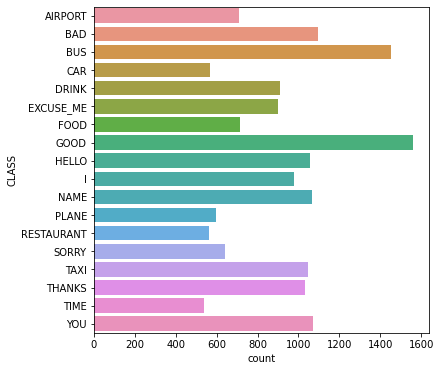

In [15]:
class_count_plt = plt.subplots(figsize=(6,6))
class_count_plt = sns.countplot(y='CLASS', data=bsl_data)
plt.show()

In [ ]:
print("\n")

Calculate the number of duplicate data in the dataset

In [16]:
dup_data = bsl_data.duplicated()
# Printing the number of duplicate data in the dataset
print("Duplicate data in Dataset:" "\n", dup_data.any())

Duplicate data in Dataset:
 False


In [ ]:
print("\n")

%% 3. Cleaning and Pre-Processing Data

In [ ]:
print("Cleaning and Pre-Processing Data")

In [ ]:
print("\n")

Clean the dataset by checking for null values and checking the number of columns<br>
Check column names of the dataset

In [17]:
print("Check columns names of the dataset")
bsl_data_cols = list(bsl_data.columns)
print(bsl_data.columns)

Check columns names of the dataset
Index(['left_palm_position_x', 'left_palm_position_y', 'left_palm_position_z',
       'left_palm_normal_x', 'left_palm_normal_y', 'left_palm_normal_z',
       'left_hand_direction_x', 'left_hand_direction_y',
       'left_hand_direction_z', 'left_palm_velocity_x',
       ...
       'right_pinky_distal_start_x', 'right_pinky_distal_start_y',
       'right_pinky_distal_start_z', 'right_pinky_distal_end_x',
       'right_pinky_distal_end_y', 'right_pinky_distal_end_z',
       'right_pinky_distal_direction_x', 'right_pinky_distal_direction_y',
       'right_pinky_distal_direction_z', 'CLASS'],
      dtype='object', length=429)


In [ ]:
print("\n")

Check for missing values in dataset

In [18]:
print("Check for missing values in dataset")
print(bsl_data.isna().sum()/len(bsl_data)*100)

Check for missing values in dataset
left_palm_position_x              0.0
left_palm_position_y              0.0
left_palm_position_z              0.0
left_palm_normal_x                0.0
left_palm_normal_y                0.0
                                 ... 
right_pinky_distal_end_z          0.0
right_pinky_distal_direction_x    0.0
right_pinky_distal_direction_y    0.0
right_pinky_distal_direction_z    0.0
CLASS                             0.0
Length: 429, dtype: float64


In [ ]:
print("\n")

Check for null values in dataset

In [19]:
print("Check for null values in dataset")
print(bsl_data.isnull().sum()/len(bsl_data)*100)

Check for null values in dataset
left_palm_position_x              0.0
left_palm_position_y              0.0
left_palm_position_z              0.0
left_palm_normal_x                0.0
left_palm_normal_y                0.0
                                 ... 
right_pinky_distal_end_z          0.0
right_pinky_distal_direction_x    0.0
right_pinky_distal_direction_y    0.0
right_pinky_distal_direction_z    0.0
CLASS                             0.0
Length: 429, dtype: float64


In [ ]:
print("\n")

Create a copy of the cleaned dataset

In [20]:
print("Create a copy of the cleaned dataset")
cleaned_bsl_data = bsl_data.copy()

Create a copy of the cleaned dataset


In [ ]:
print("\n")

Print the distribution of the target

In [21]:
print("Print the distribution of the target")
print(np.array(np.unique(bsl_data.CLASS, return_counts=False)))

Print the distribution of the target
['AIRPORT' 'BAD' 'BUS' 'CAR' 'DRINK' 'EXCUSE_ME' 'FOOD' 'GOOD' 'HELLO' 'I'
 'NAME' 'PLANE' 'RESTAURANT' 'SORRY' 'TAXI' 'THANKS' 'TIME' 'YOU']


In [ ]:
print("\n")

Call the MinMaxScaler class

In [22]:
mms = preprocessing.MinMaxScaler()

Find the feature names by its index position using iloc

In [23]:
bsl_data_features = bsl_data.iloc[:, 0:428]
bsl_data_targets = bsl_data.iloc[:, 428:429]

Fit the MinMax estimator on the features of the dataset using the MinMaxScaler

In [24]:
processed_features = mms.fit_transform(bsl_data_features)

Check the contents of the MinMax scaled features in the array

In [25]:
print("Check the contents of scaled features in the array")
print(processed_features)

Check the contents of scaled features in the array
[[0.17761808 0.61233667 0.36658514 ... 0.49993908 0.50161271 0.50079643]
 [0.17619351 0.62226551 0.36847647 ... 0.49993908 0.50161271 0.50079643]
 [0.17627364 0.6171836  0.3726471  ... 0.49993908 0.50161271 0.50079643]
 ...
 [0.57283195 0.26704276 0.16763053 ... 0.66179053 0.52094657 0.9742864 ]
 [0.55837082 0.20496459 0.15084926 ... 0.71280239 0.46917269 0.95283858]
 [0.5592332  0.13572749 0.10814406 ... 0.49993908 0.50161271 0.50079643]]


Merge the encoded labels with the scaled features into a DataFrame

In [26]:
scaled_bsl_data = pd.DataFrame(processed_features, bsl_data_targets)

Create a copy of scaled_bsl_data before performing PCA

In [27]:
scaled_bsl_data_RAW_COPY = scaled_bsl_data.copy()

In [ ]:
print("\n")

Check the first 10 rows of the scaled DataFrame

In [28]:
print("The first 10 rows of the transformed DataFrame")
print(scaled_bsl_data.head(10))

The first 10 rows of the transformed DataFrame
                 0         1         2         3         4         5    \
(AIRPORT,)  0.177618  0.612337  0.366585  0.596878  0.490133  0.008956   
(AIRPORT,)  0.176194  0.622266  0.368476  0.610860  0.402566  0.021698   
(AIRPORT,)  0.176274  0.617184  0.372647  0.598560  0.388849  0.021982   
(AIRPORT,)  0.178493  0.606195  0.368000  0.519790  0.387162  0.012560   
(AIRPORT,)  0.188531  0.606437  0.369788  0.538195  0.295633  0.044606   
(AIRPORT,)  0.255815  0.846455  0.227287  0.940753  0.653721  0.678924   
(AIRPORT,)  0.322915  0.852382  0.182417  0.993716  0.420685  0.497794   
(AIRPORT,)  0.390131  0.665024  0.145557  0.993040  0.417392  0.511394   
(AIRPORT,)  0.772018  0.405405  0.100300  0.071358  0.320560  0.689216   
(AIRPORT,)  0.446144  0.370163  0.113163  0.719941  0.098026  0.300011   

                 6         7         8         9    ...       418       419  \
(AIRPORT,)  0.768970  0.919268  0.553352  0.591679  ...  0.

In [ ]:
print("\n")

Check the last 10 rows of the transformed DataFrame

In [29]:
print("The last 10 rows of the transformed DataFrame")
print(scaled_bsl_data.tail(10))

The last 10 rows of the transformed DataFrame
             0         1         2         3         4         5         6    \
(YOU,)  0.551716  0.190535  0.098346  0.278787  0.227785  0.857380  0.195921   
(YOU,)  0.561981  0.232508  0.111899  0.284087  0.215693  0.851114  0.173888   
(YOU,)  0.572201  0.269981  0.128290  0.278263  0.193794  0.828341  0.172285   
(YOU,)  0.561715  0.238938  0.124486  0.289582  0.198991  0.840320  0.169944   
(YOU,)  0.550195  0.177210  0.115186  0.324234  0.163495  0.826228  0.199672   
(YOU,)  0.552004  0.185306  0.123965  0.354156  0.125049  0.797606  0.182708   
(YOU,)  0.558251  0.217038  0.139179  0.300927  0.154637  0.802859  0.154492   
(YOU,)  0.572832  0.267043  0.167631  0.240465  0.178234  0.782812  0.178503   
(YOU,)  0.558371  0.204965  0.150849  0.300728  0.134368  0.777885  0.167651   
(YOU,)  0.559233  0.135727  0.108144  0.491058  0.024287  0.653662  0.241159   

             7         8         9    ...       418       419       420  

In [ ]:
print("\n")

%% 4. Feature Engineering

In [ ]:
print("Feature Engineering")

In [ ]:
print("\n")

Split the PCA transformed features along with the processed targets into training and testing data<br>
80% training data and 20% testing data<br>
Having more training data will help mitigate the overfitting issue that certain ML models can induce<br>
The targets are stratified so that the samples for each class stay proportionate to the dataset, even after train and test splitting

In [30]:
features_train, features_test, target_train, target_test = train_test_split(
    processed_features, np.ravel(bsl_data_targets), test_size=0.2, random_state=100, stratify=np.ravel(bsl_data_targets))

Check the count of target variables in the target training and testing sets

In [31]:
print("Count of target variables in the target training subset" + "\n")
print(Counter(target_train))
print("\n")
print("Count of target variables in the target testing subset" + "\n")
print(Counter(target_test))

Count of target variables in the target training subset

Counter({'GOOD': 1247, 'BUS': 1162, 'BAD': 877, 'YOU': 858, 'NAME': 851, 'HELLO': 846, 'TAXI': 839, 'THANKS': 826, 'I': 784, 'DRINK': 726, 'EXCUSE_ME': 718, 'FOOD': 571, 'AIRPORT': 567, 'SORRY': 511, 'PLANE': 479, 'CAR': 454, 'RESTAURANT': 449, 'TIME': 432})


Count of target variables in the target testing subset

Counter({'GOOD': 312, 'BUS': 291, 'BAD': 219, 'YOU': 215, 'NAME': 213, 'HELLO': 211, 'TAXI': 210, 'THANKS': 207, 'I': 196, 'DRINK': 182, 'EXCUSE_ME': 180, 'AIRPORT': 142, 'FOOD': 142, 'SORRY': 128, 'PLANE': 119, 'CAR': 113, 'RESTAURANT': 112, 'TIME': 108})


In [ ]:
print("\n")

%% 4. PCA Data Analysis

Initialise the PCA<br>
The number of components could change in order to achieve the best accuracy possible<br>
To ensure enough variance is gathered from the features of the dataset, the number of components is determined by how much variance is retained<br>
95% Variance

In [32]:
pca = PCA(n_components=0.95)

Fit the PCA on the training features for analysis

In [33]:
pca_training_features = pca.fit_transform(features_train)

Transform the PCA on the testing features for analysis

In [34]:
pca_testing_features = pca.transform(features_test)

Check the number of princpal components generated, this is called on the pipeline object

In [35]:
print("Number of principal components generated",
      "\n", pca.n_components_)

Number of principal components generated 
 18


In [ ]:
print("\n")

Check the shape of the PCA training features

In [36]:
print("Shape of PCA Training Features: {}".format(pca_training_features.shape))

Shape of PCA Training Features: (13197, 18)


In [ ]:
print("\n")

Check the shape of the PCA testing features

In [37]:
print("Shape of PCA Testing Features: {}".format(pca_testing_features.shape))

Shape of PCA Testing Features: (3300, 18)


In [ ]:
print("\n")

Create a DataFrame that stores the training features

In [38]:
pca_train_features_DF = pd.DataFrame(data=pca_training_features, columns=[
    'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18'])

Create a DataFrame that stores the testing features

In [39]:
pca_test_features_DF = pd.DataFrame(data=pca_testing_features, columns=[
    'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18'])

Show the first 5 rows of the prinicipal component training DataFrame

In [40]:
print("The first 5 rows of the Principal Component Training DataFrame")
print(pca_train_features_DF.head())

The first 5 rows of the Principal Component Training DataFrame
   principal component 1  principal component 2  principal component 3  \
0               2.019438              -1.109031              -0.472858   
1               2.396165              -0.393985               0.655771   
2               1.176204               2.027800               1.651891   
3               2.156629              -1.044705               0.188490   
4               0.519548               1.546652               1.811896   

   principal component 4  principal component 5  principal component 6  \
0               0.922522              -0.343351               0.514441   
1              -1.666621              -0.115982              -0.500671   
2               0.797266               1.040526              -1.015300   
3              -0.658191              -1.040048               0.415569   
4              -0.077665              -1.696650               0.081665   

   principal component 7  principal component 8

In [ ]:
print("\n")

Show the first 5 rows of the prinicipal component testing DataFrame

In [41]:
print("The first 5 rows of the Principal Component Testing DataFrame")
print(pca_test_features_DF.head())

The first 5 rows of the Principal Component Testing DataFrame
   principal component 1  principal component 2  principal component 3  \
0              -2.225956              -0.531874              -1.157605   
1              -1.990295              -0.778327              -0.669502   
2               1.009311               1.723589               1.529120   
3               3.211239               0.593445              -0.004287   
4               0.296269               3.863068               0.991833   

   principal component 4  principal component 5  principal component 6  \
0              -0.549760               0.383926              -0.061074   
1              -0.594428               0.645365               0.611723   
2              -0.441249               0.547911               0.494543   
3              -0.142666               1.465961              -0.841076   
4              -0.277169              -0.274720               0.262854   

   principal component 7  principal component 8 

In [ ]:
print("\n")

Show the last 5 rows of the principal component training DataFrame

In [42]:
print("The last 5 rows of the Principal Component Training DataFrame")
print(pca_train_features_DF.tail())

The last 5 rows of the Principal Component Training DataFrame
       principal component 1  principal component 2  principal component 3  \
13192               0.618128               2.962569               1.079529   
13193              -2.216255              -0.500801               0.178265   
13194              -2.397919              -0.068452              -1.169922   
13195              -1.820971              -0.699583               1.529852   
13196              -2.093301              -0.329768              -1.168020   

       principal component 4  principal component 5  principal component 6  \
13192              -1.023245               0.785804              -0.505482   
13193              -0.026218               1.059426               0.771013   
13194              -0.534417               0.048950               0.015587   
13195               0.687340              -0.681610              -0.704492   
13196              -0.969283               0.307020               0.590358   



In [ ]:
print("\n")

Show the last 5 rows of the principal component training DataFrame

In [43]:
print("The last 5 rows of the Principal Component Testing DataFrame")
print(pca_test_features_DF.tail())

The last 5 rows of the Principal Component Testing DataFrame
      principal component 1  principal component 2  principal component 3  \
3295              -2.193771              -0.499999               0.375671   
3296               2.591873              -0.377641               0.366494   
3297               2.254674              -0.600513               0.384684   
3298              -2.054810              -0.794448              -0.978213   
3299               3.162037               0.208034               0.198892   

      principal component 4  principal component 5  principal component 6  \
3295               0.049268               1.093368               0.939720   
3296              -0.884403              -0.583733               0.847510   
3297              -1.194823               0.132056              -1.194559   
3298              -0.637355               0.421824              -0.241531   
3299              -0.550394               0.139544               0.558491   

      princip

In [ ]:
print("\n")

Print the cumulative sum of the PCA Training DataFrame

In [44]:
print("Cumulative sum of the PCA Training DataFrame")
print(pca_train_features_DF.cumsum())

Cumulative sum of the PCA Training DataFrame
       principal component 1  principal component 2  principal component 3  \
0               2.019438e+00          -1.109031e+00          -4.728583e-01   
1               4.415603e+00          -1.503016e+00           1.829125e-01   
2               5.591806e+00           5.247841e-01           1.834804e+00   
3               7.748435e+00          -5.199211e-01           2.023294e+00   
4               8.267983e+00           1.026731e+00           3.835190e+00   
...                      ...                    ...                    ...   
13192           8.528446e+00           1.598605e+00           6.298245e-01   
13193           6.312191e+00           1.097804e+00           8.080898e-01   
13194           3.914272e+00           1.029352e+00          -3.618320e-01   
13195           2.093301e+00           3.297683e-01           1.168020e+00   
13196          -1.950129e-11          -2.026553e-10          -8.344740e-10   

       principal c

In [ ]:
print("\n")

Print the cumulative sum of the PCA Testing DataFrame

In [45]:
print("Cumulative sum of the PCA Testing DataFrame")
print(pca_test_features_DF.cumsum())

Cumulative sum of the PCA Testing DataFrame
      principal component 1  principal component 2  principal component 3  \
0                 -2.225956              -0.531874              -1.157605   
1                 -4.216251              -1.310201              -1.827107   
2                 -3.206940               0.413389              -0.297987   
3                  0.004299               1.006834              -0.302274   
4                  0.300567               4.869902               0.689559   
...                     ...                    ...                    ...   
3295              61.869434             147.419874             -17.400431   
3296              64.461307             147.042233             -17.033937   
3297              66.715981             146.441720             -16.649253   
3298              64.661171             145.647272             -17.627466   
3299              67.823208             145.855306             -17.428574   

      principal component 4  pr

In [ ]:
print("\n")

Print the covariance matrix of the PCA Training DataFrame

In [46]:
print("Covariance Matrix of the PCA Training DataFrame: \n%s" %
      np.cov(pca_train_features_DF.T))

Covariance Matrix of the PCA Training DataFrame: 
[[ 4.71848701e+00 -3.69917293e-16 -2.13362048e-16  4.26724097e-17
  -4.15955034e-17  7.43065304e-17  4.30762495e-17 -4.41531558e-17
  -2.26419537e-16  4.52300620e-17  1.40536264e-16 -9.58446552e-17
  -9.96138270e-17  5.08838197e-17  1.32997920e-16 -1.50766873e-17
  -1.03652225e-17 -5.46529916e-17]
 [-3.69917293e-16  1.33899441e+00  5.80452462e-16 -9.42292958e-17
   2.45534622e-16 -1.97073842e-16 -6.03067493e-17  2.01919920e-17
   1.16844327e-16 -9.76619344e-17  2.04612185e-17 -1.26536483e-17
  -6.46143743e-17 -6.99989055e-18 -1.20613499e-16 -1.02306093e-17
  -4.30762495e-18  1.45382342e-17]
 [-2.13362048e-16  5.80452462e-16  1.11476566e+00 -2.03669892e-16
  -6.00375228e-17 -1.00152280e-16  1.77689529e-17  1.37843998e-16
  -1.16709714e-16 -5.35760853e-17  1.33469067e-16  1.57497537e-17
   2.70740959e-17 -7.13450383e-17 -6.50182141e-17 -6.73066399e-18
  -4.29248096e-17 -4.81242475e-17]
 [ 4.26724097e-17 -9.42292958e-17 -2.03669892e-16  7.

In [ ]:
print("\n")

Print the covariance matrix of the PCA Testing DataFrame

In [47]:
print("Covariance Matrix of the PCA Testing DataFrame: \n%s" %
      np.cov(pca_test_features_DF.T))

Covariance Matrix of the PCA Testing DataFrame: 
[[ 4.70011608e+00  6.67928620e-02  2.29754591e-02  4.60135929e-04
   5.48763982e-02  1.08078781e-03  1.19948708e-02  3.62487404e-02
   2.41422862e-02 -1.41404296e-02 -1.17731060e-03 -2.66889132e-02
   2.11378578e-02  1.67784876e-02 -7.12228128e-03  9.90877506e-03
   6.41432806e-03 -2.07780604e-02]
 [ 6.67928620e-02  1.41159990e+00  2.55855253e-02 -3.77195103e-02
   1.07215472e-02  3.46209103e-03  7.91659302e-03  6.55957596e-03
  -1.67019608e-02  8.10553885e-03 -2.81444529e-03  1.18655832e-02
  -2.91646759e-03  2.81704283e-03  1.24072873e-02 -5.93236431e-03
   4.38562353e-03 -1.31933196e-02]
 [ 2.29754591e-02  2.55855253e-02  1.13046598e+00 -3.61193813e-03
   7.03180436e-04 -1.63036034e-04  8.84096650e-03  1.67894881e-03
  -8.84917801e-03  9.97895823e-04 -1.28965149e-03 -3.86887755e-03
   1.03408378e-02 -2.34434688e-03  3.13779890e-03  5.65256489e-03
   2.52048259e-03  2.15651637e-03]
 [ 4.60135929e-04 -3.77195103e-02 -3.61193813e-03  7.3

In [ ]:
print("\n")

Find the Eigenvalues for each Principal Component

In [48]:
print("Eigenvalues for each Principal Component: {}".format(
    pca.explained_variance_))

Eigenvalues for each Principal Component: [4.71848701 1.33899441 1.11476566 0.75586625 0.52189682 0.42388533
 0.40836696 0.38774841 0.3247376  0.30850197 0.28167462 0.23289009
 0.21472287 0.18310615 0.15912186 0.12581476 0.08738561 0.08615819]


In [ ]:
print("\n")

Find the ratio of the explained variation for each principal component

In [49]:
print("Ratio of the explained variation for each Principal Component: {}".format(
    pca.explained_variance_ratio_))

Ratio of the explained variation for each Principal Component: [0.38458094 0.10913492 0.09085913 0.06160698 0.04253727 0.03454883
 0.03328401 0.03160349 0.02646778 0.0251445  0.02295793 0.01898174
 0.01750102 0.01492409 0.01296925 0.01025455 0.00712238 0.00702233]


In [ ]:
print("\n")

Find the cumulative proportion of explained variance

In [50]:
print("Cumulative proportion of explained variation: {}".format(
    np.cumsum(pca.explained_variance_ratio_)))

Cumulative proportion of explained variation: [0.38458094 0.49371586 0.58457499 0.64618197 0.68871925 0.72326808
 0.75655208 0.78815557 0.81462335 0.83976785 0.86272578 0.88170752
 0.89920854 0.91413263 0.92710188 0.93735643 0.9444788  0.95150114]


In [ ]:
print("\n")

Visualise the number of principal components required to retain maximum variance - Curve plot

Visualise Number of Principal Components Required - Curve plot


Text(0.5, 1.0, 'The Number of Principal Components Needed to Explain Variance - Curve plot')

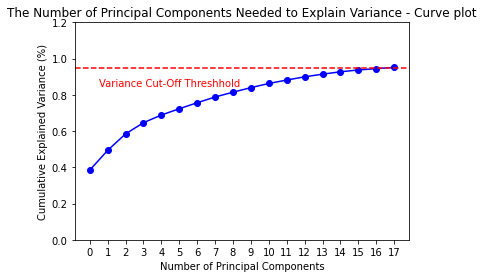

In [51]:
print("Visualise Number of Principal Components Required - Curve plot")
pca_plot, pca_ax = plt.subplots()
x_components = np.arange(0,18, step=1)
y_pca_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x_components, y_pca_variance, marker = 'o', linestyle='-', color='b')
plt.text(0.5, 0.85, 'Variance Cut-Off Threshhold', color='red', fontsize=10)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(0,18, step=1))
plt.ylabel('Cumulative Explained Variance (%)')
plt.ylim(0.0, 1.2)
plt.title("The Number of Principal Components Needed to Explain Variance - Curve plot")

In [ ]:
pca_ax.grid(axis='x')
plt.show()

In [ ]:
print("\n")

Visualise the Eigenvalues for each PCA Component - Barplot

Eigenvalues for each PCA Component - Barplot


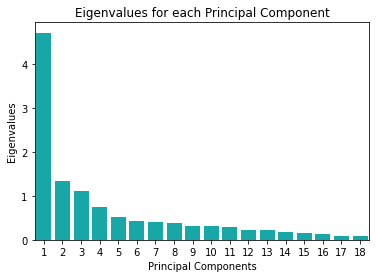

In [52]:
print("Eigenvalues for each PCA Component - Barplot")
pca_eigenvalues_DF = pd.DataFrame(
    {'Eigenvalues': pca.explained_variance_, 'Principal Components': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']})
sns.barplot(x='Principal Components', y="Eigenvalues",
            data=pca_eigenvalues_DF, color="c")
plt.title('Eigenvalues for each Principal Component')
plt.show()

In [ ]:
print("\n")

%% 5. Machine Learning Modeling<br>
%% 5.1 Support Vector Classifier Machine Model

Initialise the model with the necessary hyperparameters

In [96]:
svc = SVC(kernel='rbf', gamma='auto', C=25, random_state=42)
          
# Create the pipeline that fits both the PCA and model to the training subset of data
svc_pipe = list()
svc_pipe.append(('pca', pca))
svc_pipe.append(('svc_model', svc))
svc_pipeline = Pipeline(svc_pipe)

Declare a variable that stores the time taken to train the model

In [97]:
svc_training_time = time.time()

Fit the model and PCA within the pipeline on the training features and targets

In [98]:
svc_pipeline.fit(features_train, target_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('svc_model', SVC(C=25, gamma='auto', random_state=42))])

Check the amount of time taken to train the model

In [99]:
print("SVC Training Time: ", time.time()-svc_training_time)

Training Time:  4.289093017578125


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the training data

In [57]:
print("SVC Coefficient of Determination - Training Data: ", svc_pipeline.score(features_train, target_train))

SVC Coefficient of Determination - Training Data:  0.9440781995908161


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the testing data

In [58]:
print("SVC Coefficient of Determination - Testing Data: ", svc_pipeline.score(features_test, target_test))

SVC Coefficient of Determination - Testing Data:  0.9233333333333333


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on training data in the pipeline

In [59]:
print("SVC - Cross-Validation Score - Training Data: " + "\n", cross_val_score(svc_pipeline, features_train, target_train, cv=5))

SVC - Cross-Validation Score - Training Data: 
 [0.9094697  0.90189394 0.91284577 0.91322471 0.91815081]


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on testing data in the pipeline

In [60]:
print("SVC - Cross-Validation Score - Testing Data: " + "\n", cross_val_score(svc_pipeline, features_test, target_test, cv=5))

SVC - Cross-Validation Score - Testing Data: 
 [0.86363636 0.88939394 0.88030303 0.87121212 0.89545455]


In [ ]:
print("\n")

Predict the accuracy of the target classification based on the PCA transformed testing features

In [61]:
svc_target_test_pred = svc_pipeline.predict(features_test)
print("Support Vector Classifier Prediction - Testing Data: ", metrics.accuracy_score(
    target_test, svc_target_test_pred))

Support Vector Classifier Prediction - Testing Data:  0.9233333333333333


In [ ]:
print("\n")

Print the classification report for this model to check the recall and f1 score on the testing data

In [62]:
print("Classification Report - SVC: " + "\n", metrics.classification_report(target_test, svc_target_test_pred))

Classification Report - SVC: 
               precision    recall  f1-score   support

     AIRPORT       0.96      0.92      0.94       142
         BAD       0.81      0.95      0.88       219
         BUS       0.98      0.96      0.97       291
         CAR       0.90      0.89      0.90       113
       DRINK       0.89      0.94      0.91       182
   EXCUSE_ME       0.92      0.83      0.87       180
        FOOD       0.90      0.93      0.91       142
        GOOD       0.93      0.93      0.93       312
       HELLO       0.93      0.95      0.94       211
           I       0.91      0.91      0.91       196
        NAME       0.95      0.93      0.94       213
       PLANE       0.95      0.88      0.92       119
  RESTAURANT       0.92      0.86      0.89       112
       SORRY       0.98      0.96      0.97       128
        TAXI       0.94      0.90      0.91       210
      THANKS       0.93      0.96      0.95       207
        TIME       0.87      0.81      0.84       

Show the test predictions made on a confusion matrix

In [63]:
svc_test_cm = metrics.confusion_matrix(target_test, svc_target_test_pred)

Set the axis labels for the Confusion Matrices

In [64]:
x_cm_labels = bsl_data.CLASS.unique()
y_cm_labels = bsl_data.CLASS.unique()

In [ ]:
print("\n")

Visualise the confusion matrix for the testing subset using matplotlib and Seaborn

Confusion Matrix - Support Vector Classifier Prediction - Testing Data


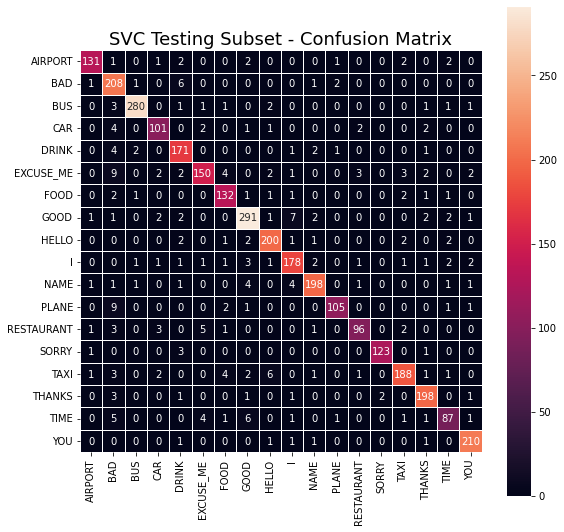

In [65]:
print("Confusion Matrix - Support Vector Classifier Prediction - Testing Data")
svc_ax = plt.subplots(figsize=(9, 9))
svc_ax = plt.title('SVC Testing Subset - Confusion Matrix', fontsize=18)
svc_ax = sns.heatmap(svc_test_cm, xticklabels=x_cm_labels, yticklabels=y_cm_labels, square=True, annot=True,
                    fmt="d", cbar=True, linewidths=.5)
plt.show()

In [ ]:
print("\n")

%% 5.2 K-Nearest Neighbour Model

Initialise the model with the necessary hyperparameters<br>
The number of neighbours for the model might change in order to improve accuracy<br>
Default is 5 n_neighbors

In [66]:
knn = KNeighborsClassifier()

Create the pipeline that fits both the PCA and model to the training subset of data

In [67]:
knn_pipe = list()
knn_pipe.append(('pca', pca))
knn_pipe.append(('knn_model', knn))
knn_pipeline = Pipeline(knn_pipe)

Declare a variable that stores the time taken to train the model

In [68]:
knn_training_time = time.time()

Fit the pipeline on the training features and targets

In [69]:
knn_pipeline.fit(features_train, target_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('knn_model', KNeighborsClassifier())])

Check the amount of time taken to train the model

In [70]:
print("K-NN Training Time: ", time.time()-knn_training_time)

Training Time:  3.1735148429870605


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the training data

In [71]:
print("K-NN Coefficient of Determination - Training Data: ", knn_pipeline.score(features_train, target_train))

K-NN Coefficient of Determination - Training Data:  0.9353640979010381


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the testing data

In [72]:
print("K-NN Coefficient of Determination - Testing Data: ", knn_pipeline.score(features_test, target_test))

K-NN Coefficient of Determination - Testing Data:  0.9124242424242425


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on training data in the pipeline

In [73]:
print("K-NN - Cross-Validation Score - Training Data: " + "\n", cross_val_score(knn_pipeline, features_train, target_train, cv=5))

K-NN - Cross-Validation Score - Training Data: 
 [0.89431818 0.88484848 0.90488822 0.90299356 0.9022357 ]


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on testing data in the pipeline

In [74]:
print("K-NN - Cross-Validation Score - Testing Data: " + "\n", cross_val_score(knn_pipeline, features_test, target_test, cv=5))

K-NN - Cross-Validation Score - Testing Data: 
 [0.82878788 0.85151515 0.85       0.83030303 0.84848485]


In [ ]:
print("\n")

Predict the accuracy of the target classification based on the PCA transformed testing features

In [75]:
knn_target_test_pred = knn_pipeline.predict(features_test)
print("K-Nearest Neighbours Prediction - Testing Data: ",
      metrics.accuracy_score(target_test, knn_target_test_pred))

K-Nearest Neighbours Prediction - Testing Data:  0.9124242424242425


In [ ]:
print("\n")

Print the classification report for this model to check the recall and f1 score on the testing data

In [76]:
print("Classification Report - K-Nearest Neighbours: " + "\n", metrics.classification_report(target_test, knn_target_test_pred))

Classification Report - K-Nearest Neighbours: 
               precision    recall  f1-score   support

     AIRPORT       0.92      0.90      0.91       142
         BAD       0.82      0.90      0.86       219
         BUS       0.95      0.95      0.95       291
         CAR       0.91      0.89      0.90       113
       DRINK       0.90      0.94      0.92       182
   EXCUSE_ME       0.84      0.82      0.83       180
        FOOD       0.87      0.87      0.87       142
        GOOD       0.95      0.92      0.93       312
       HELLO       0.96      0.93      0.94       211
           I       0.89      0.91      0.90       196
        NAME       0.93      0.93      0.93       213
       PLANE       0.91      0.87      0.89       119
  RESTAURANT       0.89      0.88      0.88       112
       SORRY       0.95      0.96      0.96       128
        TAXI       0.90      0.88      0.89       210
      THANKS       0.92      0.97      0.94       207
        TIME       0.88      0.80

Show the testing predictions made on a confusion matrix

In [77]:
knn_test_cm = metrics.confusion_matrix(target_test, knn_target_test_pred)

In [ ]:
print("\n")

Visualise the confusion matrix using matplotlib and Seaborn

Confusion Matrix - K-Nearest Neighbours Prediction - Testing Data


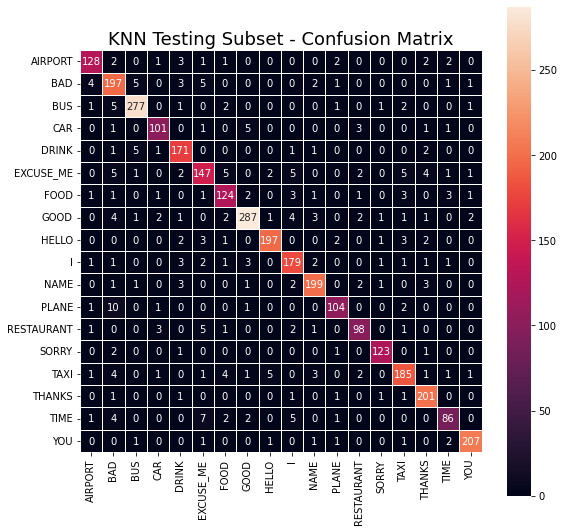

In [78]:
print("Confusion Matrix - K-Nearest Neighbours Prediction - Testing Data")
knn_ax = plt.subplots(figsize=(9, 9))
knn_ax = plt.title('KNN Testing Subset - Confusion Matrix' , fontsize=18)
knn_ax = sns.heatmap(knn_test_cm, xticklabels=x_cm_labels, yticklabels=y_cm_labels, square=True, annot=True,
                      fmt="d", cbar=True, linewidths=.5)
plt.show()

In [ ]:
print("\n")

%% 5.3 Random Forests Model

Initialise the model with the necessary hyperparameters

In [79]:
rfc = RandomForestClassifier()

Create the pipeline that fits both the PCA and model to the training subset of data

In [80]:
rfc_pipe = list()
rfc_pipe.append(('pca', pca))
rfc_pipe.append(('rfc_model', rfc))
rfc_pipeline = Pipeline(rfc_pipe)

Declare a variable that stores the time taken to train the model

In [81]:
rfc_training_time = time.time()

Fit the model on the training features and targets

In [82]:
rfc_pipeline.fit(features_train, target_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('rfc_model', RandomForestClassifier())])

Check the amount of time taken to train the model

In [83]:
print("Random Forest Training Time: ", time.time()-rfc_training_time)

Training Time:  7.7693164348602295


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the training data

In [84]:
print("Random Forest Coefficient of Determination - Training Data: ", rfc_pipeline.score(features_train, target_train))

Random Forest Coefficient of Determination - Training Data:  1.0


In [ ]:
print("\n")

Check the accuracy of the model in the pipeline on the testing data

In [85]:
print("Random Forest Coefficient of Determination - Testing Data: ", rfc_pipeline.score(features_test, target_test))

Random Forest Coefficient of Determination - Testing Data:  0.9227272727272727


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on training data in the pipeline

In [86]:
print("Random Forest Classifier - Cross-Validation Score - Training Data: " + "\n", cross_val_score(rfc_pipeline, features_train, target_train, cv=5))

Random Forest Classifier - Cross-Validation Score - Training Data: 
 [0.90833333 0.90151515 0.91322471 0.91511936 0.91625616]


In [ ]:
print("\n")

Check cross-validation score over 5 K-folds of the model on testing data in the pipeline

In [87]:
print("Random Forest Classifier - Cross-Validation Score - Testing Data: " + "\n", cross_val_score(rfc_pipeline, features_test, target_test, cv=5))

Random Forest Classifier - Cross-Validation Score - Testing Data: 
 [0.84848485 0.87272727 0.86363636 0.86515152 0.87272727]


In [ ]:
print("\n")

Predict the accuracy of the target classification based on the PCA transformed testing features

In [88]:
rfc_target_test_pred = rfc_pipeline.predict(features_test)
print("Random Forest Classifier Prediction - Testing Data: ",
      metrics.accuracy_score(target_test, rfc_target_test_pred))

Random Forest Classifier Prediction - Testing Data:  0.9227272727272727


In [ ]:
print("\n")

Print the classification report for this model to check the recall and f1 score on the testing data

In [89]:
print("Classification Report - Random Forest Classifier: " + "\n", metrics.classification_report(target_test, rfc_target_test_pred))

Classification Report - Random Forest Classifier: 
               precision    recall  f1-score   support

     AIRPORT       0.93      0.88      0.90       142
         BAD       0.83      0.91      0.87       219
         BUS       0.96      0.94      0.95       291
         CAR       0.96      0.90      0.93       113
       DRINK       0.89      0.96      0.92       182
   EXCUSE_ME       0.88      0.85      0.87       180
        FOOD       0.90      0.91      0.91       142
        GOOD       0.95      0.93      0.94       312
       HELLO       0.95      0.91      0.93       211
           I       0.91      0.91      0.91       196
        NAME       0.94      0.94      0.94       213
       PLANE       0.94      0.90      0.92       119
  RESTAURANT       0.88      0.91      0.89       112
       SORRY       0.97      0.96      0.96       128
        TAXI       0.90      0.90      0.90       210
      THANKS       0.95      0.98      0.97       207
        TIME       0.90      

Show the testing predictions made on a confusion matrix

In [90]:
rfc_test_cm = metrics.confusion_matrix(target_test, rfc_target_test_pred)

In [ ]:
print("\n")

Visualise the confusion matrix using matplotlib and Seaborn

Confusion Matrix - Random Forest Prediction - Testing Data


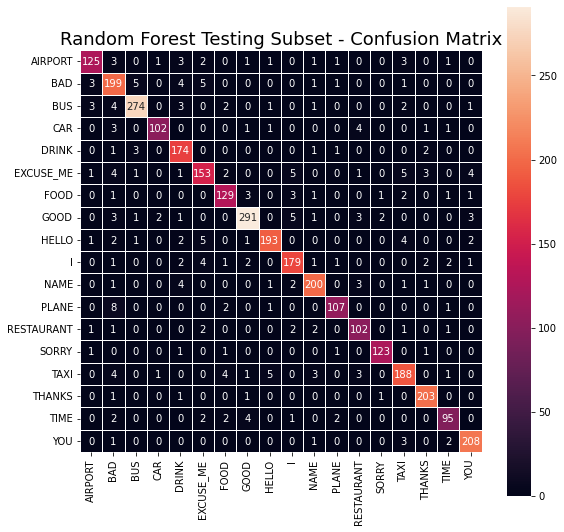

In [91]:
print("Confusion Matrix - Random Forest Prediction - Testing Data")
rfc_ax = plt.subplots(figsize=(9, 9))
rfc_ax = plt.title('Random Forest Testing Subset - Confusion Matrix', fontsize=18)
rfc_ax = sns.heatmap(rfc_test_cm, xticklabels=x_cm_labels, yticklabels=y_cm_labels, square=True, annot=True,
                      fmt="d", cbar=True, linewidths=.5)
plt.show()

In [ ]:
print("\n")

%% 6. Model Accuracy Results

Visualise the accuracy for each learning

In [ ]:
print("Overall accuracy for each learning")

Create the DataFrame containing the results from each model

In [92]:
accuracy_scores_DF = pd.DataFrame([['Support Vector Classifier', metrics.accuracy_score(target_test, svc_target_test_pred)],
                                    ['K-Nearest Neighbours',
                                        metrics.accuracy_score(target_test, knn_target_test_pred)],
                                    ['Random Forest Classifier', metrics.accuracy_score(target_test, rfc_target_test_pred)]],
                                  columns=['Models', 'Accuracy'])

Reshape the DataFrame using pandas.melt

In [93]:
accuracy_scores_DF = pd.melt(
    frame=accuracy_scores_DF, id_vars='Models', var_name='Accuracy', value_name='Level of Accuracy')

Print the resulting DataFrame

In [94]:
print("Overall Accuracy Scores: ", "\n", accuracy_scores_DF)

Overall Accuracy Scores:  
                       Models  Accuracy  Level of Accuracy
0  Support Vector Classifier  Accuracy           0.923333
1       K-Nearest Neighbours  Accuracy           0.912424
2   Random Forest Classifier  Accuracy           0.922727


In [ ]:
print("\n")

Plot the DataFrame as a Barplot

Model Classification Accuracy Scores


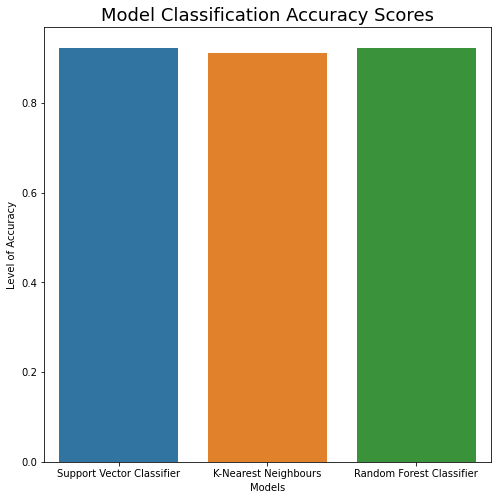

In [95]:
print("Model Classification Accuracy Scores")
accuracy_scores_plot = plt.subplots(figsize=(8, 8))
accuracy_scores_plot = plt.title("Model Classification Accuracy Scores", fontsize=18)
accuracy_scores_plot = sns.barplot(
    data=accuracy_scores_DF, x='Models', y='Level of Accuracy')
plt.show()

%% 7. Export DataFrames

Raw input data

In [ ]:
bsl_data.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\RAW_data.csv')

Dataset features

In [ ]:
bsl_data_features.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\FEATURES_data.csv')

Dataset targets

In [ ]:
bsl_data_targets.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\TARGETS_data.csv')

Scaled dataset features

In [ ]:
scaled_bsl_data.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\SCALED_FEATURES_data.csv')

PCA Components training features

In [ ]:
pca_train_features_DF.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\PCA_TRAIN_FEATURES_data.csv')

PCA Components testing features

In [ ]:
pca_test_features_DF.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\PCA_TEST_FEATURES_data.csv')

PCA Eigenvalues dataset

In [ ]:
pca_eigenvalues_DF.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\PCA_EIGENVALUES_data.csv')

Accuracy Scores dataset

In [ ]:
accuracy_scores_DF.to_csv(r'C:\Users\laptop\Documents\TU - Modules\Machine Learning\ICA Assignment\B1662096_Thomas_Popham\ICA Element 1 - Application\DataFrames\ACCURACY_SCORES_data.csv')

Print message once exporting is complete

In [ ]:
print("Exporting Complete")